# **Analysis & Preprocessing of Raw Data**

In [1]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load SMS Dataset 
sms_data_path = os.path.join('data', 'raw', 'Dataset_5971.csv')
df_sms =  pd.read_csv(sms_data_path)

# Remove unneeded columns & Relabel
df_sms = df_sms[['TEXT','LABEL']]
df_sms.rename(columns={ 'TEXT': 'text', 'LABEL': 'label'}, inplace=True)

new_labels = {
    'ham' : 0, 
    'spam': 1, 
    'smishing': 1
}

# Convert Labels & drop nulls
df_sms['label'] = df_sms['label'].apply(lambda x: new_labels[x.lower()])
df_sms.dropna(inplace=True)
df_sms.drop_duplicates(inplace=True)

df_sms.head()



,text,label
0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0
1,What's up? Do you want me to come online? If y...,0
2,So u workin overtime nigpun?,0
3,"Also sir, i sent you an email about how to log...",0
4,Please Stay At Home. To encourage the notion o...,1


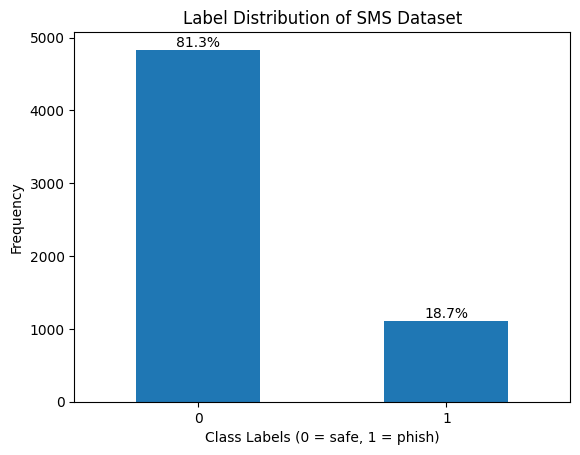

In [3]:
# Plot Label Distribution
label_counts = df_sms['label'].value_counts()
percentages = 100 * label_counts / label_counts.sum()

ax = label_counts.plot(kind='bar')
plt.title('Label Distribution of SMS Dataset')
plt.xlabel('Class Labels (0 = safe, 1 = phish)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

# Annotating the bars with percentages
for i, value in enumerate(label_counts):
    plt.text(i, value, f'{percentages[i]:.1f}%', ha='center', va='bottom')

plt.show()


In [4]:
# Load Email Dataset 
email_data_path = os.path.join('data', 'raw', 'Phishing_Email.csv')
df_email = pd.read_csv(email_data_path)

# Remove unneeded columns & relabel
df_email = df_email[['Email Text', 'Email Type']]
df_email.rename(columns={ 'Email Text': 'text', 'Email Type': 'label'}, inplace=True)

new_labels = { 
    'safe email' : 0, 
    'phishing email' : 1
}

df_email['label'] = df_email['label'].apply(lambda x: new_labels[x.lower()])
df_email.dropna(inplace=True)
df_email.drop_duplicates(inplace=True)


df_email.head()

,text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1


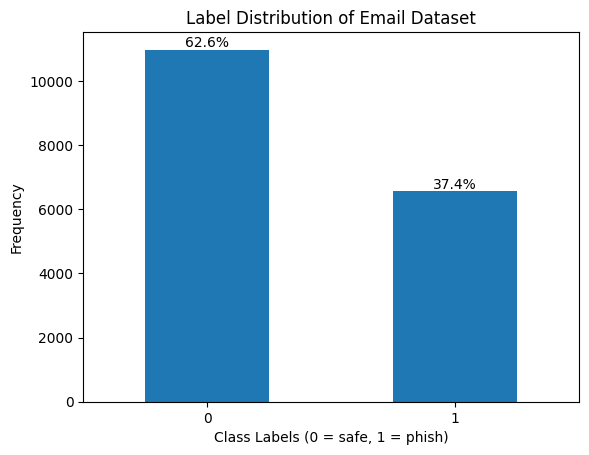

In [6]:
# Plot Label Distribution
label_counts = df_email['label'].value_counts()
percentages = 100 * label_counts / label_counts.sum()

ax = label_counts.plot(kind='bar')
plt.title('Label Distribution of Email Dataset')
plt.xlabel('Class Labels (0 = safe, 1 = phish)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

# Annotating the bars with percentages
for i, value in enumerate(label_counts):
    plt.text(i, value, f'{percentages[i]:.1f}%', ha='center', va='bottom')

plt.show()


Luckily, these two datasets are already quite clean, so we can go ahead and merge them & check the severity of the imbalance. In the future a model like gpt3 or llama2 will be used to generate sythetic data to supplement the deficit in the SMS dataset 

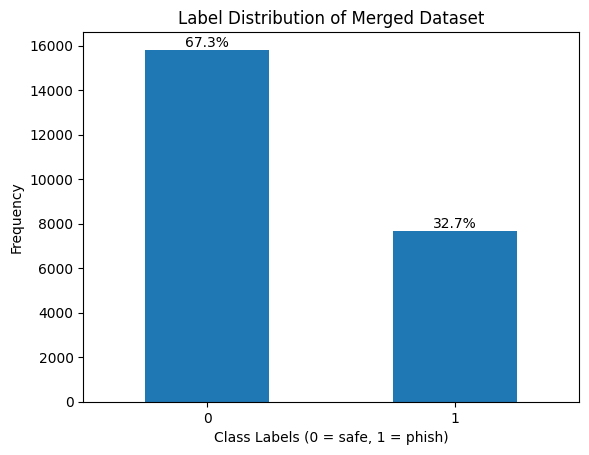

In [7]:
df_merged = pd.concat([df_sms, df_email])
label_counts = df_merged['label'].value_counts()
percentages = 100 * label_counts / label_counts.sum()

ax = label_counts.plot(kind='bar')
plt.title('Label Distribution of Merged Dataset')
plt.xlabel('Class Labels (0 = safe, 1 = phish)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

# Annotating the bars with percentages
for i, value in enumerate(label_counts):
    plt.text(i, value, f'{percentages[i]:.1f}%', ha='center', va='bottom')

plt.show()


In [8]:
# split & save

df_train, df_test = train_test_split(df_merged, test_size=0.3, random_state=42)

print(f'Train Samples: {len(df_train)}.', f'Test Samples: {len(df_test)}')

# Save merged dataset for huggingface upload
df_train.to_csv(os.path.join('data', 'phishing_dataset', 'train.csv'), index=False)
df_test.to_csv(os.path.join('data', 'phishing_dataset', 'test.csv'), index=False)

Train Samples: 16440. Test Samples: 7047


TODO FURTHER WORD ANALYSIS

In [ ]:
# Tokenize & save tokenized data